In [1]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
recession=pd.read_csv('../data/USRECD.csv')
SP500=pd.read_csv('../data/S&P500.csv')

In [4]:
display(SP500.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [10]:
display(recession.head())

,DATE,USRECD
0,1990-01-01,0
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [7]:
data = SP500.loc[:, ['Date', 'Adj Close']]
data['Adj Close'] = data['Adj Close'].astype(float)
data = data.set_index('Date')
data.head(5)
type(data)
data = data.pct_change().dropna()
data.head(5)
display(data.shape)
cutoff = 1000
marvok_regression = sm.tsa.MarkovAutoregression(data[:cutoff], k_regimes=2, order=4, switching_ar=True)
res = marvok_regression.fit()
display(res.summary())


(8063, 1)

C:\Users\AIR-USER14\anaconda3\envs\markov_regime_switching\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                Adj Close   No. Observations:                  996
Model:             MarkovAutoregression   Log Likelihood                3430.285
Date:                  Thu, 24 Nov 2022   AIC                          -6834.569
Time:                          22:30:52   BIC                          -6770.821
Sample:                               0   HQIC                         -6810.336
                                  - 996                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.001     -2.166      0.030      -0.004      -0.000
ar.L1          0.2612      0.106      2.467      0.014       0.054       0.469
ar.L2          0.3419      0.093      3.681      0.000       0.160       0.524
ar.L3          0.3307      0.126      2.624      0.009       0.084       0.578
ar.L4          0.0662      0.164      0.403      0.687      -0.255       0.388
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.000      3.537      0.000       0.001       0.002
ar.L1         -0.0123      0.048     -0.256      0.798      -0.106       0.081
ar.L2         -0.1673      0.055     -3.028      0.002      -0.276      -0.059
ar.L3         -0.1971      0.055     -3.587      0.000      -0.305      -0.089
ar.L4          0.0245      0.069      0.353      0.724      -0.112       0.161
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.063e-05   3.07e-06     16.506      0.000    4.46e-05    5.66e-05
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.2488      0.119      2.084      0.037       0.015       0.483
p[1->0]        0.3216      0.108      2.972      0.003       0.110       0.534
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

(996, 2)

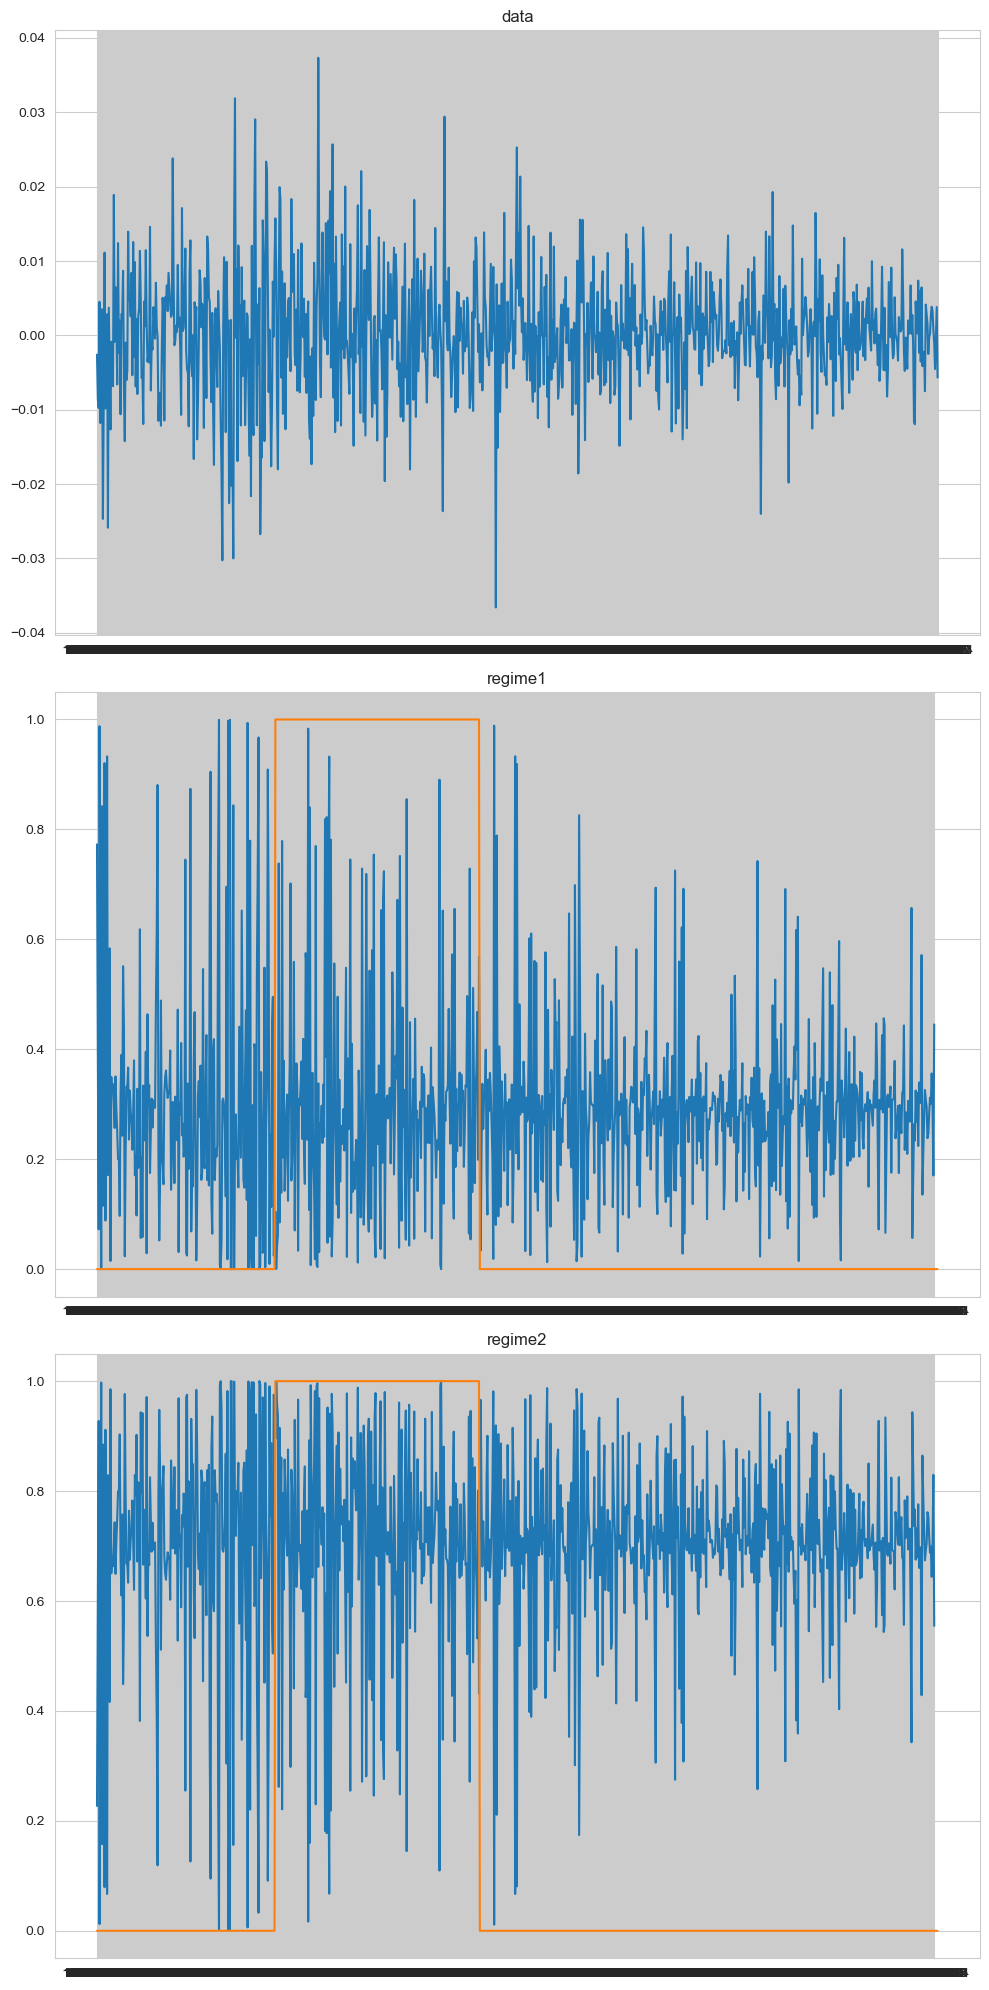

In [13]:
## Plotting


fig, ax = plt.subplots(3, 1, figsize=(10, 20))
ax[0].plot(data[:cutoff])
ax[0].set_title('data')
display(res.smoothed_marginal_probabilities.shape)
ax[1].plot(res.smoothed_marginal_probabilities[0])
ax[1].plot(recession['USRECD'][:cutoff])
ax[1].set_title('regime1')

ax[2].plot(res.smoothed_marginal_probabilities[1])
ax[2].plot(recession['USRECD'][:cutoff])
ax[2].set_title('regime2')


# ax[3].plot(res.smoothed_marginal_probabilities[2])
# ax[3].set_title('regime3')
# sum = res.smoothed_marginal_probabilities[0] + res.smoothed_marginal_probabilities[1]
plt.tight_layout()


In [ ]:
# try voting

In [14]:
type( res.smoothed_marginal_probabilities)

pandas.core.frame.DataFrame

In [16]:
agg_prob=pd.DataFrame(np.zeros((res.smoothed_marginal_probabilities.shape[0], res.smoothed_marginal_probabilities.shape[1])))

In [ ]:
for i in range(len(res.smoothed_marginal_probabilities[0])/7):
    avg_0=res.smoothed_marginal_probabilities[0][i:i+7].mean()
    avg_1=res.smoothed_marginal_probabilities[1][i:i+7].mean()
    if avg_1<=avg_0:
        agg_prob[0][i:i+7]=np.ones(1,7)
        agg_prob[0][i:i+7]=np.zeros(1,7)
